# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

In [2]:
# Load the training labels
root = 'data/GTSRB' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Discover csv
print(data.shape)
print(data.columns)
print(data.head(3))

(39209, 8)
Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  


Amount of samples in data:  39209


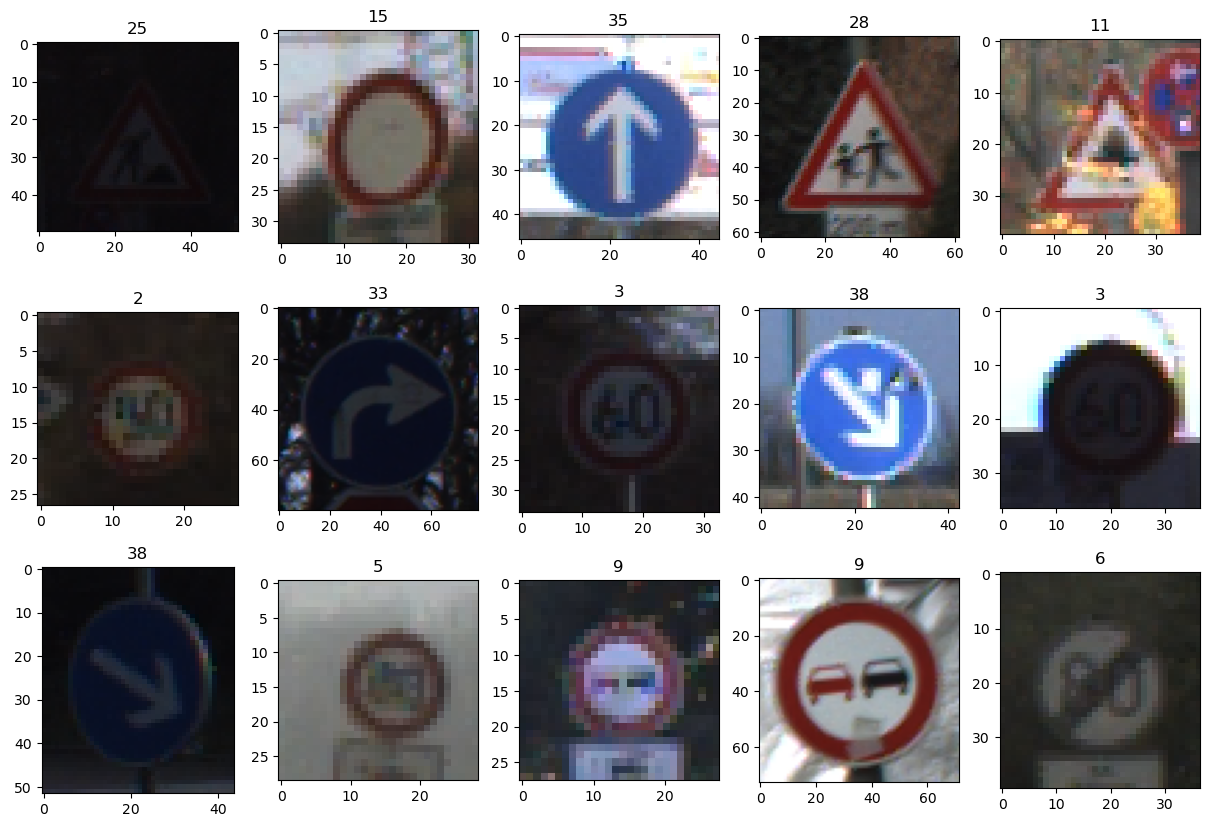

In [3]:
# Number of training samples (amount of samples in data)
num_samples = data.shape[0]
print('Amount of samples in data: ', num_samples)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [4]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId'].tolist()

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

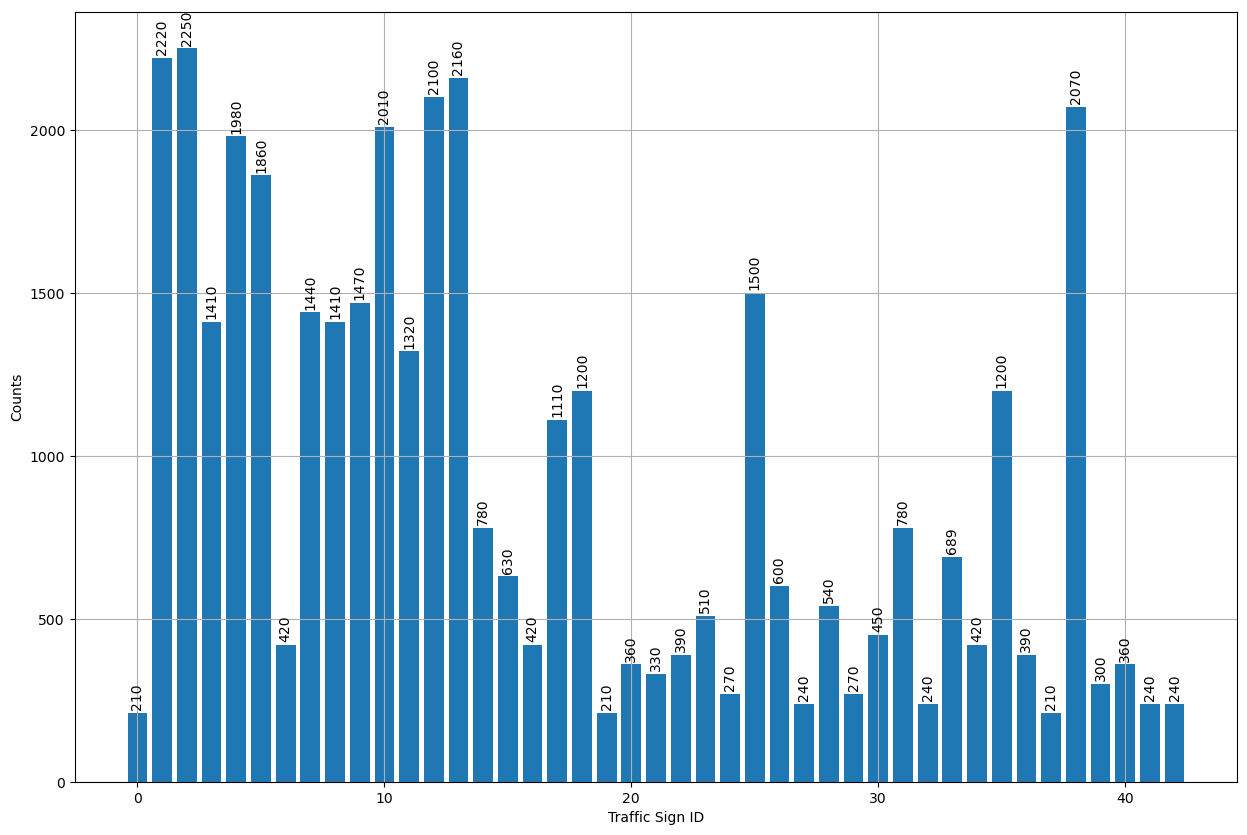

In [5]:
from collections import Counter
hist = Counter(ids)

bars = plt.bar(hist.keys(), hist.values())
plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 10,
        f'{int(height)}',
        ha='center',
        va='bottom',
        rotation=90 
    )


### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

### Answers

* The dataset is not sufficiently balanced. The difference in numbers between different classes is more than 10 times.  
The imbalance maybe is less significant between classes that are visually very different.  
But in this case we have visually close class 0 (Speed Limit 20) and Class 2 (Speed Limit 50), between which there is also a ten-fold difference.

* From the histogram, it looks like сlasses with more then 2000 samples are over-represented and some classes with about 200 samples are under-represeneted.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

### 1. Resolution distribution

#### 1.1 Resolution distribution in Dataset

(Text(0.5, 0, 'Resolution (Width x Height in pixels)'),
 Text(0, 0.5, 'Number of Samples'))

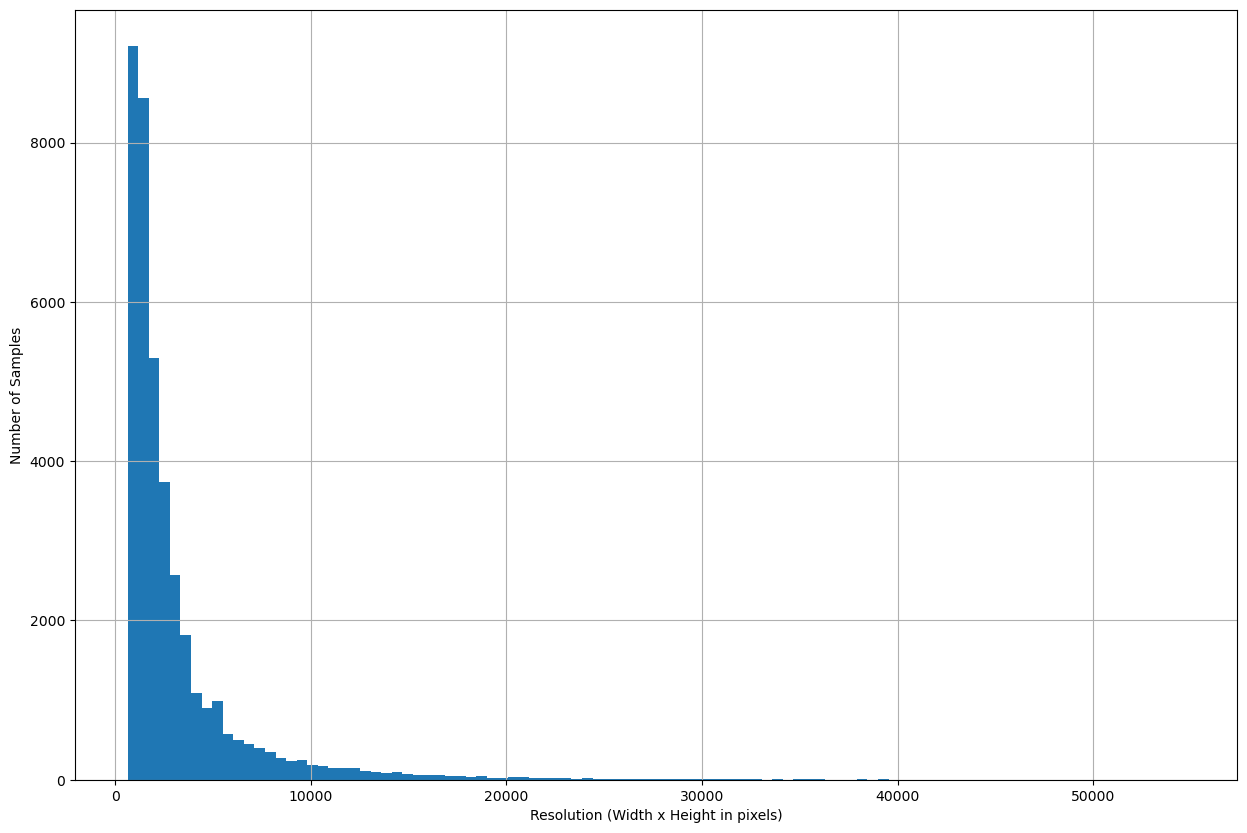

In [6]:
# Define Resolution for samples as Width * Height in pixels and 
# Add calculated Resolution to new column in Pandas series
data['Resolution'] = data['Width'] * data['Height']

bars = plt.hist(data['Resolution'], bins=100)
plt.grid(True)
plt.xlabel('Resolution (Width x Height in pixels)'), plt.ylabel('Number of Samples')


#### 1.2 Resolution distribution per-class

* By median resolution classes are well balanced. (All in range 1200 - 3100 pixels) 

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Median resolution of samples'))

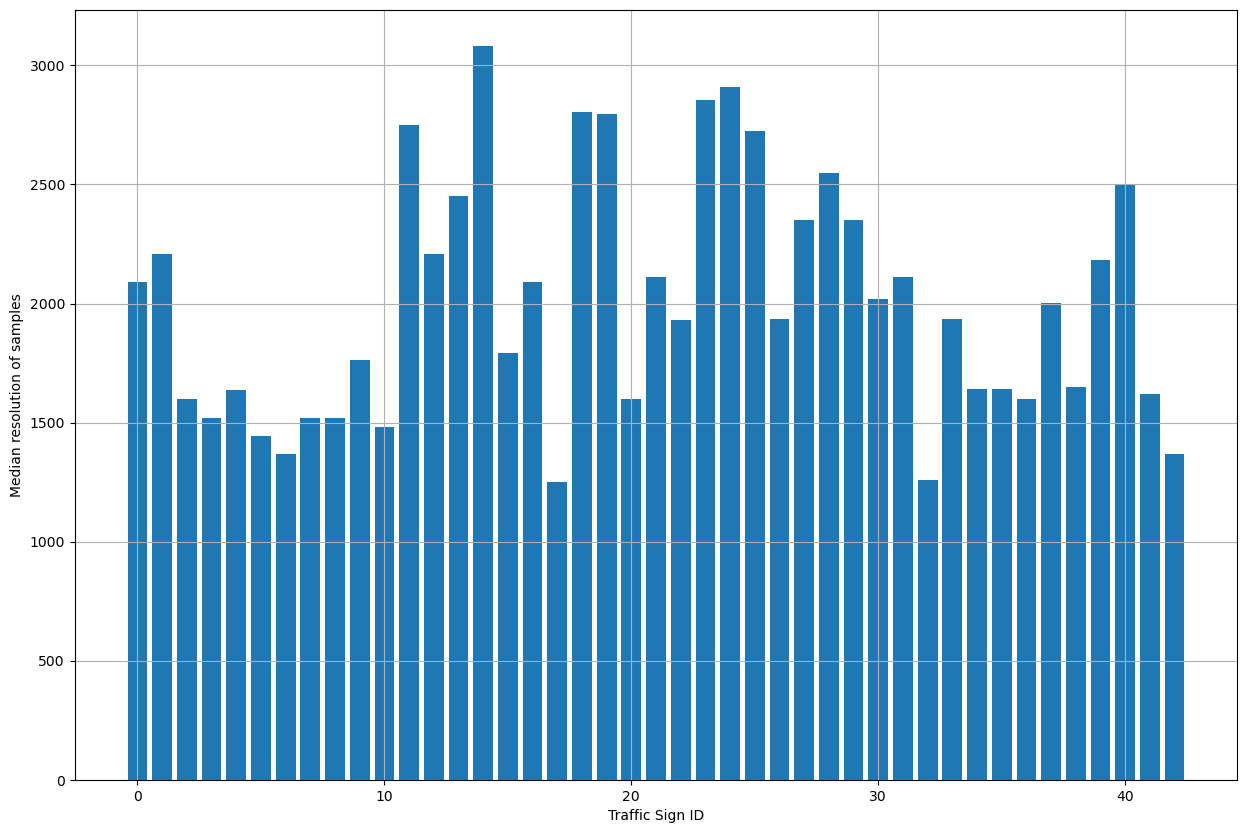

In [7]:
# Calculate median resolution per-class
median_per_class_resolution = data.groupby('ClassId')['Resolution'].median()

# Show histogram
bars = plt.bar(median_per_class_resolution.index, median_per_class_resolution.values)
plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Median resolution of samples')

#### Brightness distribution per-class

* By median brightness classes are also well balanced. (All in range 35 - 125 ) 

100%|███████████████████████████████████████████████████████████████████████████| 39209/39209 [00:40<00:00, 962.00it/s]


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Median brightness of samples'))

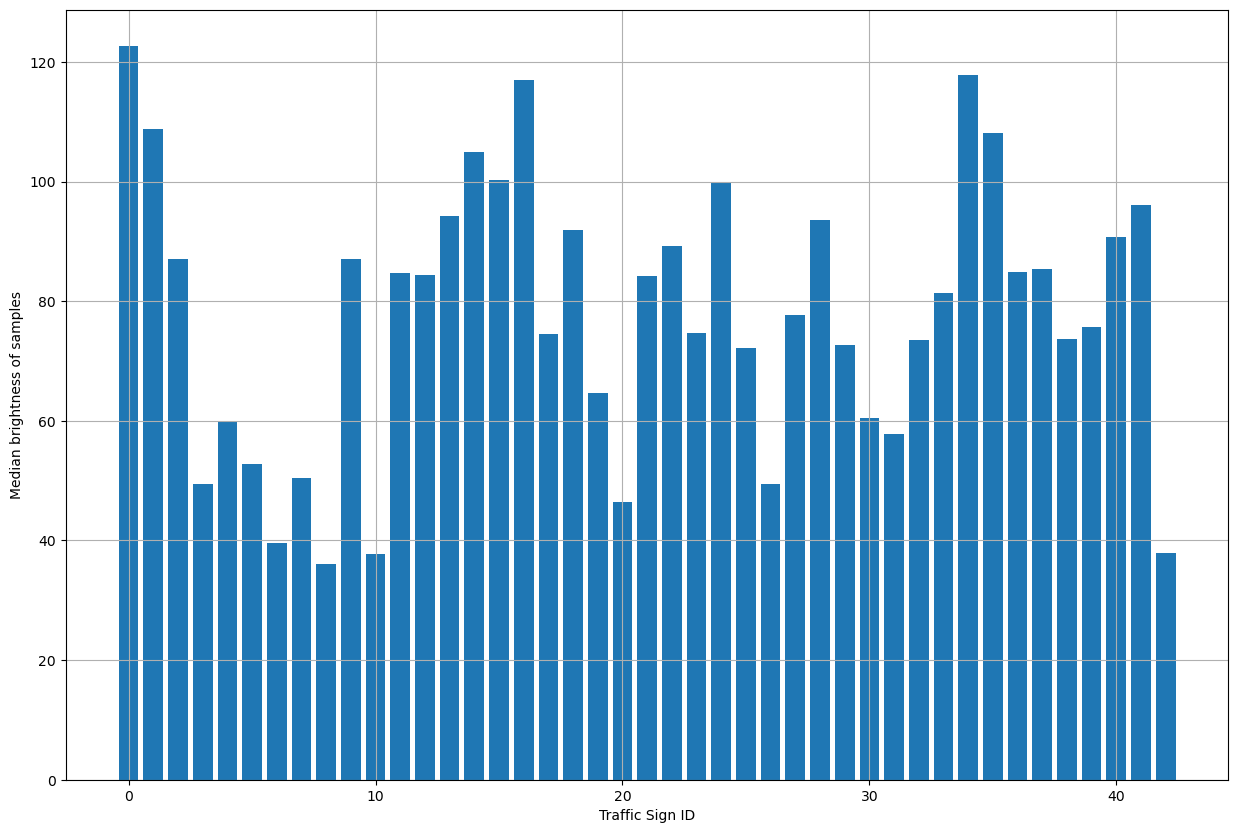

In [8]:
# Take brightness as mean from grayscale (0 - 255 scale)
# Calculate the brightness for each training sample and add it to new column 'Brightness' in Pandas series

brightness_list = []
n_rows = len(data)

for idx in tqdm(range(n_rows)):
    row = data.iloc[idx]
    # Load image
    img = cv2.imread(os.path.join(root, row['Path']))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brightness = np.mean(gray)
    brightness_list.append(brightness)

data['Brightness'] = brightness_list


# Calculate median brightness per-class
median_per_class_brightness = data.groupby('ClassId')['Brightness'].median()

# Show histogram
bars = plt.bar(median_per_class_brightness.index, median_per_class_brightness.values)
plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Median brightness of samples')
